# scikit-learn中的逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:, 1] < 1.5, dtype="int") #圆变成抛物线了
for _ in range(20):
    y[np.random.randint(200)] = 1 # 加入一些噪音

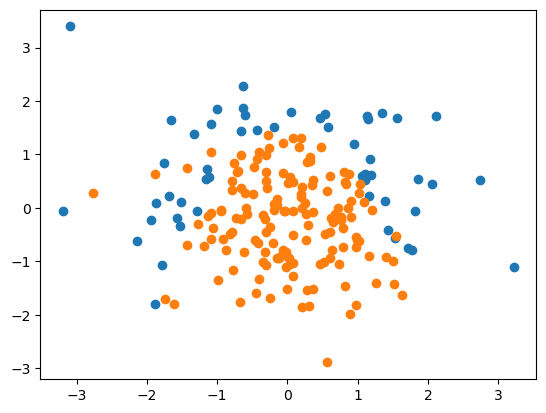

In [2]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()
# orange是1，蓝色是0

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

#### 使用scikit-learn中的逻辑回归

In [4]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)# 默认C=1.0， 默认是使用L2正则项

LogisticRegression()

In [5]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [6]:
log_reg.score(X_test, y_test)

0.86

In [7]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)


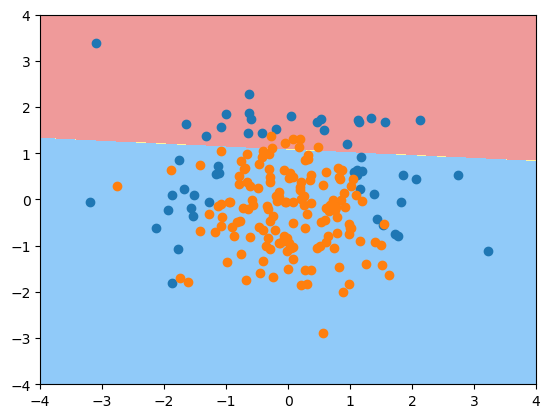

In [8]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression(solver="liblinear"))
    ])

In [10]:
poly_log_reg = PolynomialLogisticRegression(degree=2)

In [11]:
poly_log_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [12]:
poly_log_reg.score(X_train, y_train)

0.9133333333333333

In [13]:
poly_log_reg.score(X_test, y_test)

0.94

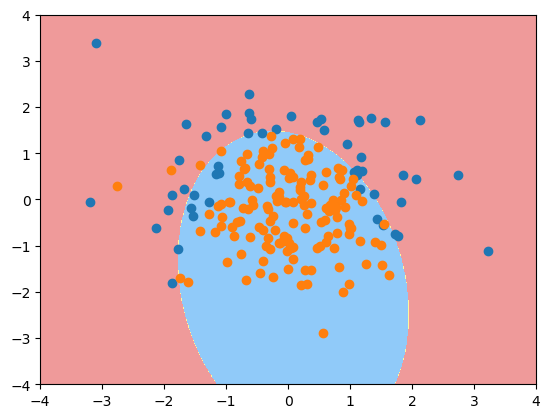

In [14]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

##### 不使用模型正则化，C=1，正则化项目：L2

In [15]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(solver='liblinear'))])

In [16]:
poly_log_reg2.score(X_train, y_train)

0.94

In [17]:
poly_log_reg2.score(X_test, y_test)

0.92

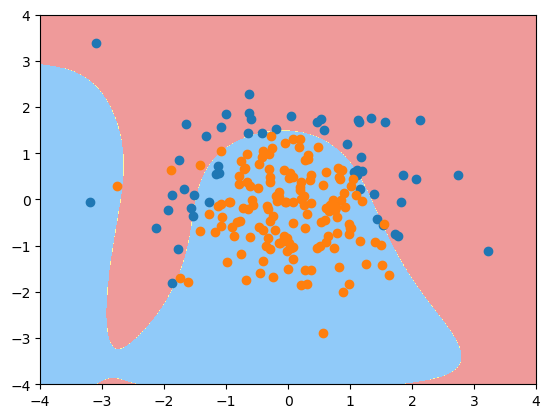

In [18]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

##### 加入正则

0.8533333333333334 0.92


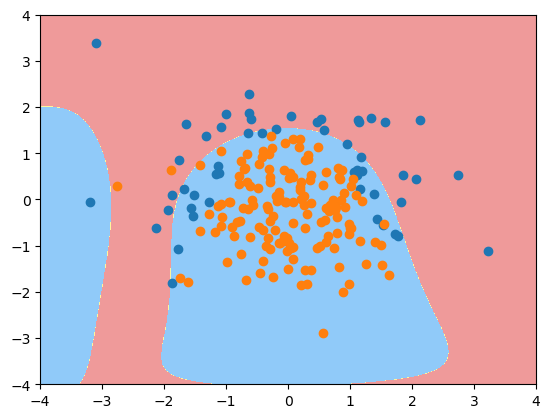

In [19]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression(C=C, solver="liblinear")) # 自己实现的类，毫无障碍的使用是因为按照sklearn的设计标准来就可以。
    ])
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1) # 使得模型正则化的项目起更大的作用
poly_log_reg3.fit(X_train, y_train)
print(
    poly_log_reg3.score(X_train, y_train),
    poly_log_reg3.score(X_test, y_test)
)
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

0.8266666666666667 0.9


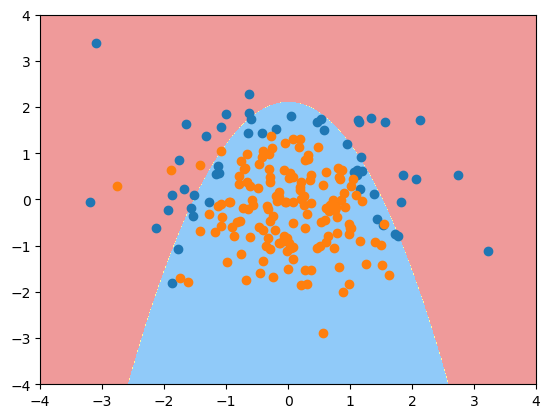

In [20]:
def PolynomialLogisticRegression(degree, C, penalty="l2"):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("log_reg", LogisticRegression(C=C, penalty=penalty, solver="liblinear")) # 只有solver是saga/liblinear的时候支持L1
    ])
# 使得模型正则化的项目起更大的作用, 使用LASSO
poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty="l1") 
poly_log_reg4.fit(X_train, y_train)
print(
    poly_log_reg4.score(X_train, y_train),
    poly_log_reg4.score(X_test, y_test)
)
plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()